In [9]:
%matplotlib inline
import pandas as pd

In [10]:
baseline = open("/user/alexeys/baseline/skimmed/3/output3_jaccard_5gram1048576_50k_ordered_uncut_combined/part-00000-91a88355-736d-44d3-97e7-d190e9276af3-c000.json").read()
baseline_df = pd.read_json('[%s]' % ','.join(baseline.splitlines()))

In [20]:
baseline_df['length_smaller'] = baseline_df.apply(lambda x: len(x['content1_smaller']),axis=1)
baseline_df['length_larger'] = baseline_df.apply(lambda x: len(x['content2_larger']),axis=1)

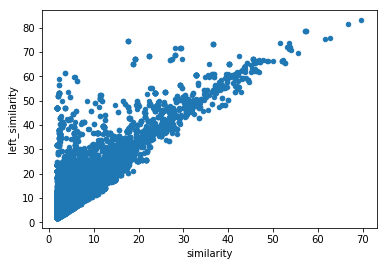

In [13]:
#baseline_df.columns
baseline_df.plot(x="similarity",y="left_similarity",kind="scatter")

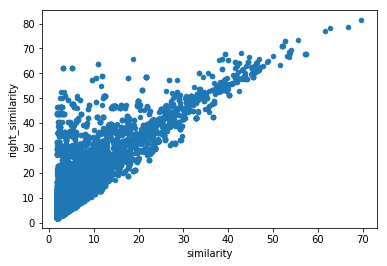

In [14]:
baseline_df.plot(x="similarity",y="right_similarity",kind="scatter")

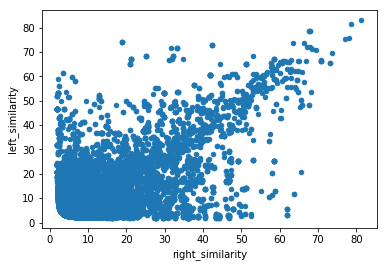

In [15]:
baseline_df.plot(x="right_similarity",y="left_similarity",kind="scatter")

In [28]:
from math import sqrt,fabs
baseline_df['relative_length'] = baseline_df.apply(lambda row: fabs(row['length_larger']-row['length_smaller'])/sqrt(row['length_larger']*row['length_smaller']),axis=1)


In [42]:
similar_length_bills = baseline_df[baseline_df.relative_length < 0.5]

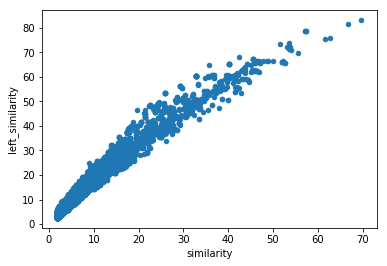

In [43]:
similar_length_bills.plot(x="similarity",y="left_similarity",kind="scatter")

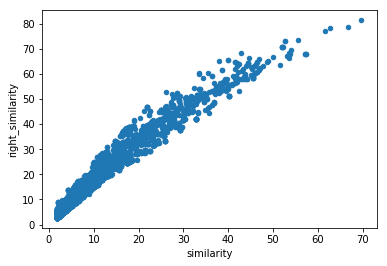

In [44]:
similar_length_bills.plot(x="similarity",y="right_similarity",kind="scatter")

In [46]:
different_length_bills = baseline_df[baseline_df.relative_length > 0.5]

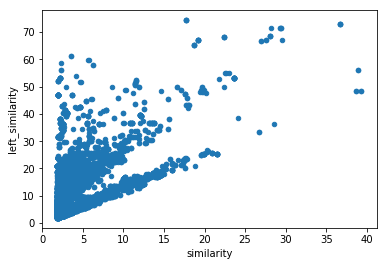

In [47]:
different_length_bills.plot(x="similarity",y="left_similarity",kind="scatter")

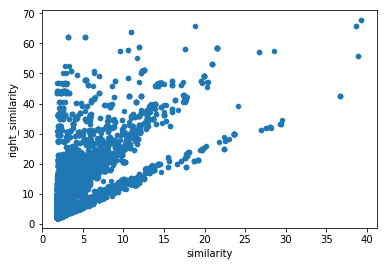

In [48]:
different_length_bills.plot(x="similarity",y="right_similarity",kind="scatter")